1.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X , y = mnist.data, mnist.target 

In [3]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]   

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
accuracy = knn_clf.score(X_test, y_test)
print("KNN Classifier Accuracy:", accuracy)

KNN Classifier Accuracy: 0.9688


In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
]
grid_search = GridSearchCV(knn_clf, param_grid, cv=3)
grid_search.fit(X_train[:10000], y_train[:10000])


,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [6]:
grid_search.best_params_ 


{'n_neighbors': 3, 'weights': 'distance'}

In [7]:
grid_search.best_score_

np.float64(0.9384995788121104)

In [8]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy 

0.9717

2.

In [18]:
from scipy.ndimage import shift
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval=0, mode= 'constant')
    return shifted_image.reshape([-1])

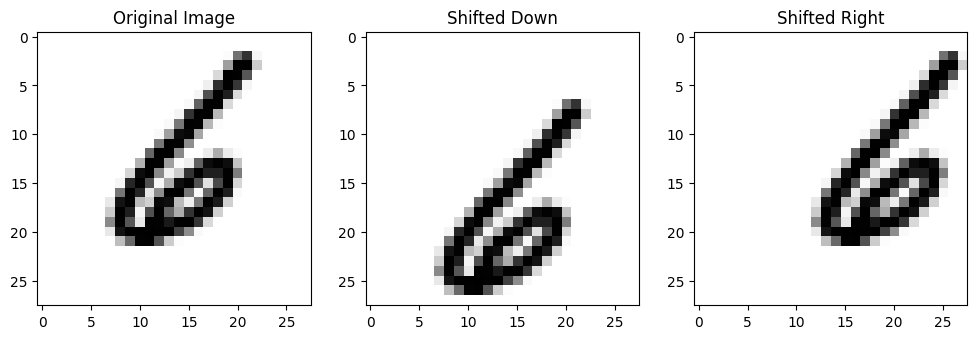

In [22]:
from matplotlib import pyplot as plt
image = X_train[999]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_right = shift_image(image, 5, 0)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(image.reshape(28,28), cmap='Greys')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(shifted_image_down.reshape(28,28), cmap='Greys')
plt.title('Shifted Down')
plt.subplot(1,3,3)
plt.imshow(shifted_image_right.reshape(28,28), cmap='Greys')
plt.title('Shifted Right')
plt.show()

In [24]:
import numpy as np
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [25]:
shuffled_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffled_idx]
y_train_augmented = y_train_augmented[shuffled_idx]

In [26]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

4.